# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Richard Ryan
- **Email:** ryan4username@gmail.com
- **ID Dicoding:** richard_ryan_A4Ev

## Menentukan Pertanyaan Bisnis

- Kategori produk apakah yang menghasilkan pemasukan terbesar?
- Kota manakah yang penduduknya melakukan pengeluaran dengan nominal total terbesar selama tahun 2016-2018 (dengan memperhitungkan biaya kirim)?
- Pada bulan dan tahun manakah didapatkan nominal penjualan terbesar (tanpa memperhitungkan biaya kirim)?
- Berapa harga rata-rata dari setiap produk di setiap kategorinya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

1) Untuk memastikan integritas data, dataset yang digunakan akan didownload melalui script dan tidak didapat melalui upload user  
2) Untuk mencegah error, apabila folder dataset sudah ada sebelumnya maka sebelum dataset didownload ulang folder tersebut akan dihapus terlebih dahulu.  
3) Setelah dataset didownload dan di unzip, file zip dataset bisa dihapus  
4) Untuk menjawab 4 pertanyaan yang ada, diperlukan 5 dataset yang dapat dibuka dengan fungsi pd.read_csv(), 5 dataset ini adalah dataset pelanggan, dataset order, dataset detail order, dataset pembayaran, dan dataset produk  

<hr>

Pertanyaan pertama adalah mengenai kategori produk yang menghasilkan pemasukan terbesar, data ini bisa didapatkan melalui 2 dataset, yaitu dataset detail order (untuk id produk dan pemasukan) dan dataset detail produk (untuk id produk dan kategori produk)

<hr>

Pertanyaan kedua adalah mengenai kota yang melakukan pembelian dengan nominal terbesar dengan memperhitungkan biaya kirim, disini dibutuhkan 3 dataset yaitu dataset pelanggan (id pelanggan dan asal kota), dataset order (id pelanggan dan id order), dan dataset pembayaran (id order dan nominal pembayaran)

<hr>

Pertanyaan ketiga adalah mengenai bulan dan tahun dengan nominal penjualan total terbesar tanpa memperhitungkan biaya kirim, disini dibutuhkan 2 dataset, dataset order (id order dan tanggal pemesanan) dan dataset detail order (id order dan harga produk terjual)

<hr>

Pertanyaan keempat adalah mengenai harga rata-rata dari produk yang terjual dari setiap kategorinya. Disini dibutuhkan 2 dataset yaitu dataset detail order (id produk dan harga) dan dataset produk (id produk dan nama kategori produk)

In [2]:
os.chdir("/content")
if os.path.exists("/content/E-Commerce Public Dataset"):
  !rm -rf "/content/E-Commerce Public Dataset"
!gdown --id 1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK -O E-Commerce.zip
!unzip -q /content/E-Commerce.zip -d /content
!rm /content/E-Commerce.zip

os.chdir("/content/E-Commerce Public Dataset")

customer_data = pd.read_csv("customers_dataset.csv", delimiter=",")
order_data = pd.read_csv("orders_dataset.csv", delimiter=",")
order_detail = pd.read_csv("order_items_dataset.csv", delimiter=",")
payment_data = pd.read_csv("order_payments_dataset.csv", delimiter=",")
product_data = pd.read_csv("products_dataset.csv", delimiter=",")

Q1_data = pd.merge(order_detail, product_data, on='product_id')

Q2_data = pd.merge(pd.merge(customer_data, order_data, on='customer_id'), payment_data, on='order_id')

Q3_data = pd.merge(order_data, order_detail, on='order_id')

Q4_data = pd.merge(order_detail, product_data, on='product_id')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=51832ee2-6d37-422f-9e61-0e5725674277
To: /content/E-Commerce.zip
100% 44.9M/44.9M [00:00<00:00, 161MB/s]


### Assessing Data

Dalam tahap Assessing Data, diperlukan beberapa pengecekan seperti Missing Value, Duplicate Data, Invalid Value, dan lain-lain. Untuk dataset ini hanya akan dilakukan pengecekan Missing Value dan Duplikasi Data saja sebab untuk pengecekan Invalid Value tidak bisa ditemukan tanpa bantuan dari penyedia data

In [3]:
Q1_DuplicateValue = Q1_data.duplicated().sum()
Q2_DuplicateValue = Q2_data.duplicated().sum()
Q3_DuplicateValue = Q3_data.duplicated().sum()
Q4_DuplicateValue = Q4_data.duplicated().sum()

Q1_MissingValue = Q1_data.isnull().sum()
Q2_MissingValue = Q2_data.isnull().sum()
Q3_MissingValue = Q3_data.isnull().sum()
Q4_MissingValue = Q4_data.isnull().sum()

print("----------------------Q1 Duplicate Value----------------------")
print(Q1_DuplicateValue)
print("")
print("----------------------Q2 Duplicate Value----------------------")
print(Q2_DuplicateValue)
print("")
print("----------------------Q3 Duplicate Value----------------------")
print(Q3_DuplicateValue)
print("")
print("----------------------Q4 Duplicate Value----------------------")
print(Q4_DuplicateValue)
print("")
print("##############################################################")
print("----------------------Q1 Missing Value----------------------")
print(Q1_MissingValue)
print("")
print("----------------------Q2 Missing Value----------------------")
print(Q2_MissingValue)
print("")
print("----------------------Q3 Missing Value----------------------")
print(Q3_MissingValue)
print("")
print("----------------------Q4 Missing Value----------------------")
print(Q4_MissingValue)
print("")

----------------------Q1 Duplicate Value----------------------
0

----------------------Q2 Duplicate Value----------------------
0

----------------------Q3 Duplicate Value----------------------
0

----------------------Q4 Duplicate Value----------------------
0

##############################################################
----------------------Q1 Missing Value----------------------
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

----------------------Q2 Missing Value----------------------
customer_id 

- Untuk dataset pertama, terdapat missing value pada kolom nama kategori dan detail produk lainnya, nilai missing value ini perlu kita atasi pada tahap data cleaning untuk bisa dengan akurat menjawab pertanyaan yang diajukan (Kategori produk yang menghasilkan pemasukan terbesar)
- Untuk dataset kedua, terdapat missing value pada kolom tanggal konfirmasi order dan pengiriman produk, nilai missing value ini tidak perlu diatasi pada tahap data cleaning sebab tidaklah relevan dengan pertanyaan yang diajukan (kota dengan pengeluaran terbesar)
- Untuk dataset ketiga, terdapat missing value pada kolom tanggal konfirmasi order dan pengiriman produk, nilai missing value ini tidak perlu diatasi pada tahap data cleaning sebab tidaklah relevan dengan pertanyaan yang diajukan (Bulan dengan jumlah penjualan terbanyak)
- Untuk dataset keempat, terdapat missing value pada kolom nama kategori dan detail produk lainnya, nilai missing value ini perlu kita atasi pada tahap data cleaning untuk bisa dengan akurat menjawab pertanyaan yang diajukan (Harga rata-rata dari setiap produk di setiap kategori)

### Cleaning Data

Berdasarkan hasil asesmen data sebelumnya, hanya dataset pertama dan keempat yang memiliki masalah pada missing valuenya. Menurut saya, akan lebih baik apabila nilai missing value untuk nama kategori diisikan dengan nama kategori baru yang unik seperti misalkan kolom tersebut diisikan "Tidak Diketahui", kolom lainnya yang memiliki Missing Value tidaklah relevan dalam menjawab pertanyaan sehingga tidak perlu untuk diisikan

In [4]:
nama_kolom_baru = "Tidak Diketahui"
if nama_kolom_baru in Q1_data['product_category_name'].values:
  print("Nama pengisi tidaklah unik di dataset pertama")
else:
  print("Nama pengisi bisa untuk digunakan untuk dataset pertama")

if nama_kolom_baru in Q4_data['product_category_name'].values:
  print("Nama pengisi tidaklah unik di dataset keempat")
else:
  print("Nama pengisi bisa untuk digunakan untuk dataset keempat")

Nama pengisi bisa untuk digunakan untuk dataset pertama
Nama pengisi bisa untuk digunakan untuk dataset keempat


Telah dibuktikan bahwa kategori "Tidak Diketahui" adalah kategori baru sehingga bisa digunakan untuk mengisi kolom nama kategori yang kosong pada dataset pertama dan keempat


In [5]:
Q1_data['product_category_name'] = Q1_data['product_category_name'].fillna(nama_kolom_baru)
Q4_data['product_category_name'] = Q4_data['product_category_name'].fillna(nama_kolom_baru)

## Exploratory Data Analysis (EDA)

### Explore ...

Untuk menjawab pertanyaan pertama, hanya dibutuhkan data dari 2 kolom yaitu harga produk dan nama kategori sehingga bisa dibuat dataframe baru yang hanya mengandung 2 kolom tersebut untuk kemudahan analisis.  
Setelah itu, kelompokkan semua harga untuk dijumlahkan berdasarkan nama kategori produknya dengan menggunakan fungsi groupby() dan panggil fungsi sum() pada kolom harga produk

<hr>

Untuk menjawab pertanyaan kedua, hanya dibutuhkan data dari 2 kolom yaitu nama kota dan pengeluaran total sama seperti pertanyaan pertama, bisa dibuat dataframe baru yang hanya mengandung 2 kolom tersebut untuk kemudahan analisis  
Lalu, kelompokkan semua harga untuk dijumlahkan berdasarkan nama kota dengan menggunakan fungsi groupby() dan panggil fungsi sum() pada kolom pengeluaran

<hr>

Untuk menjawab pertanyaan ketiga, hanya dibutuhkan data dari 2 kolom yaitu tanggal pembelian dan harga barang sama seperti pertanyaan pertama dan kedua, bisa dibuat dataframe baru yang hanya mengandung 2 kolom tersebut untuk kemudahan analisis. Akan tetapi pertama perlu diekstrak terlebih dahulu bulan dan tahun dari timestamp waktu pembelian yang dimiliki  
Kemudian, kelompokkan semua harga untuk dijumlahkan berdasarkan nama kota dengan menggunakan fungsi groupby dan panggil fungsi sum() pada kolom pengeluaran

<hr>

Sebelum menjawab pertanyaan keempat, perlu didrop terlebih dahulu data produk yang dibeli lebih dari 1 kali karena jika tidak akan menimbulkan bias terhadap harga produk tersebut. Setelah itu, untuk menjawab pertanyaan keempat hanya dibutuhkan 2 kolom yaitu nama kategori dan harga produk yang termasuk di kategori tersebut.  
Setelah itu, kelompokkan semua produk berdasarkan nama kelompoknya kemudian hitung rata-rata harga di setiap kelompok tersebut dengan menggunakan fungsi groupby() lalu dipanggil fungsi mean() pada kolom harga

In [6]:
Q1_data_relevan = Q1_data[['product_category_name', 'price']].copy()
Q1_kelompok_Kategori_Harga = Q1_data_relevan.groupby('product_category_name')['price'].sum()

Q2_data_relevan = Q2_data[['customer_city', 'payment_value']].copy()
Q2_kelompok_Kota_Pengeluaran = Q2_data_relevan.groupby('customer_city')['payment_value'].sum()

Q3_data['month_year'] = pd.to_datetime(Q3_data['order_purchase_timestamp']).dt.strftime('%B %Y')
Q3_data_relevan = Q3_data[['month_year', 'price']].copy()
Q3_kelompok_Tanggal_Harga = Q3_data_relevan.groupby('month_year')['price'].sum()

Q4_data_relevan = Q4_data.drop_duplicates(subset=['product_id'], keep='first')
Q4_data_relevan = Q4_data[['product_category_name', 'price']].copy()
Q4_kelompok_produk_harga = Q4_data_relevan.groupby('product_category_name')['price'].mean()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pertama, dapat diurutkan terlebih dahulu berdasarkan harga total dengan menggunakan fungsi sort_values() pada kolom "price" dan flag ascending diset False agar pengurutan dilakukan secara menurun / descending

Kategori produk terbaik adalah kategori yang muncul pertama sebab pengurutan dilakukan secara descending, nama kategori bisa diakses dengan melihat nama index ke-0 dari dataset yang telah diurutkan

Langkah berikut ini bersifat opsional, nama kategori produk bisa juga ditranslasikan ke bahasa inggris dengan menggunakan dataset translasi nama kategori kemudian dicari entry yang bersangkutan

Terakhir, hasil analisis bisa divisualisasikan sebagai horizontal bar chart karena jumlah kategori yang banyak

Kategori dengan pemasukan terbesar adalah beleza_saude atau dalam bahasa inggris health_beauty
dengan pemasukan total sebesar 1258681.34


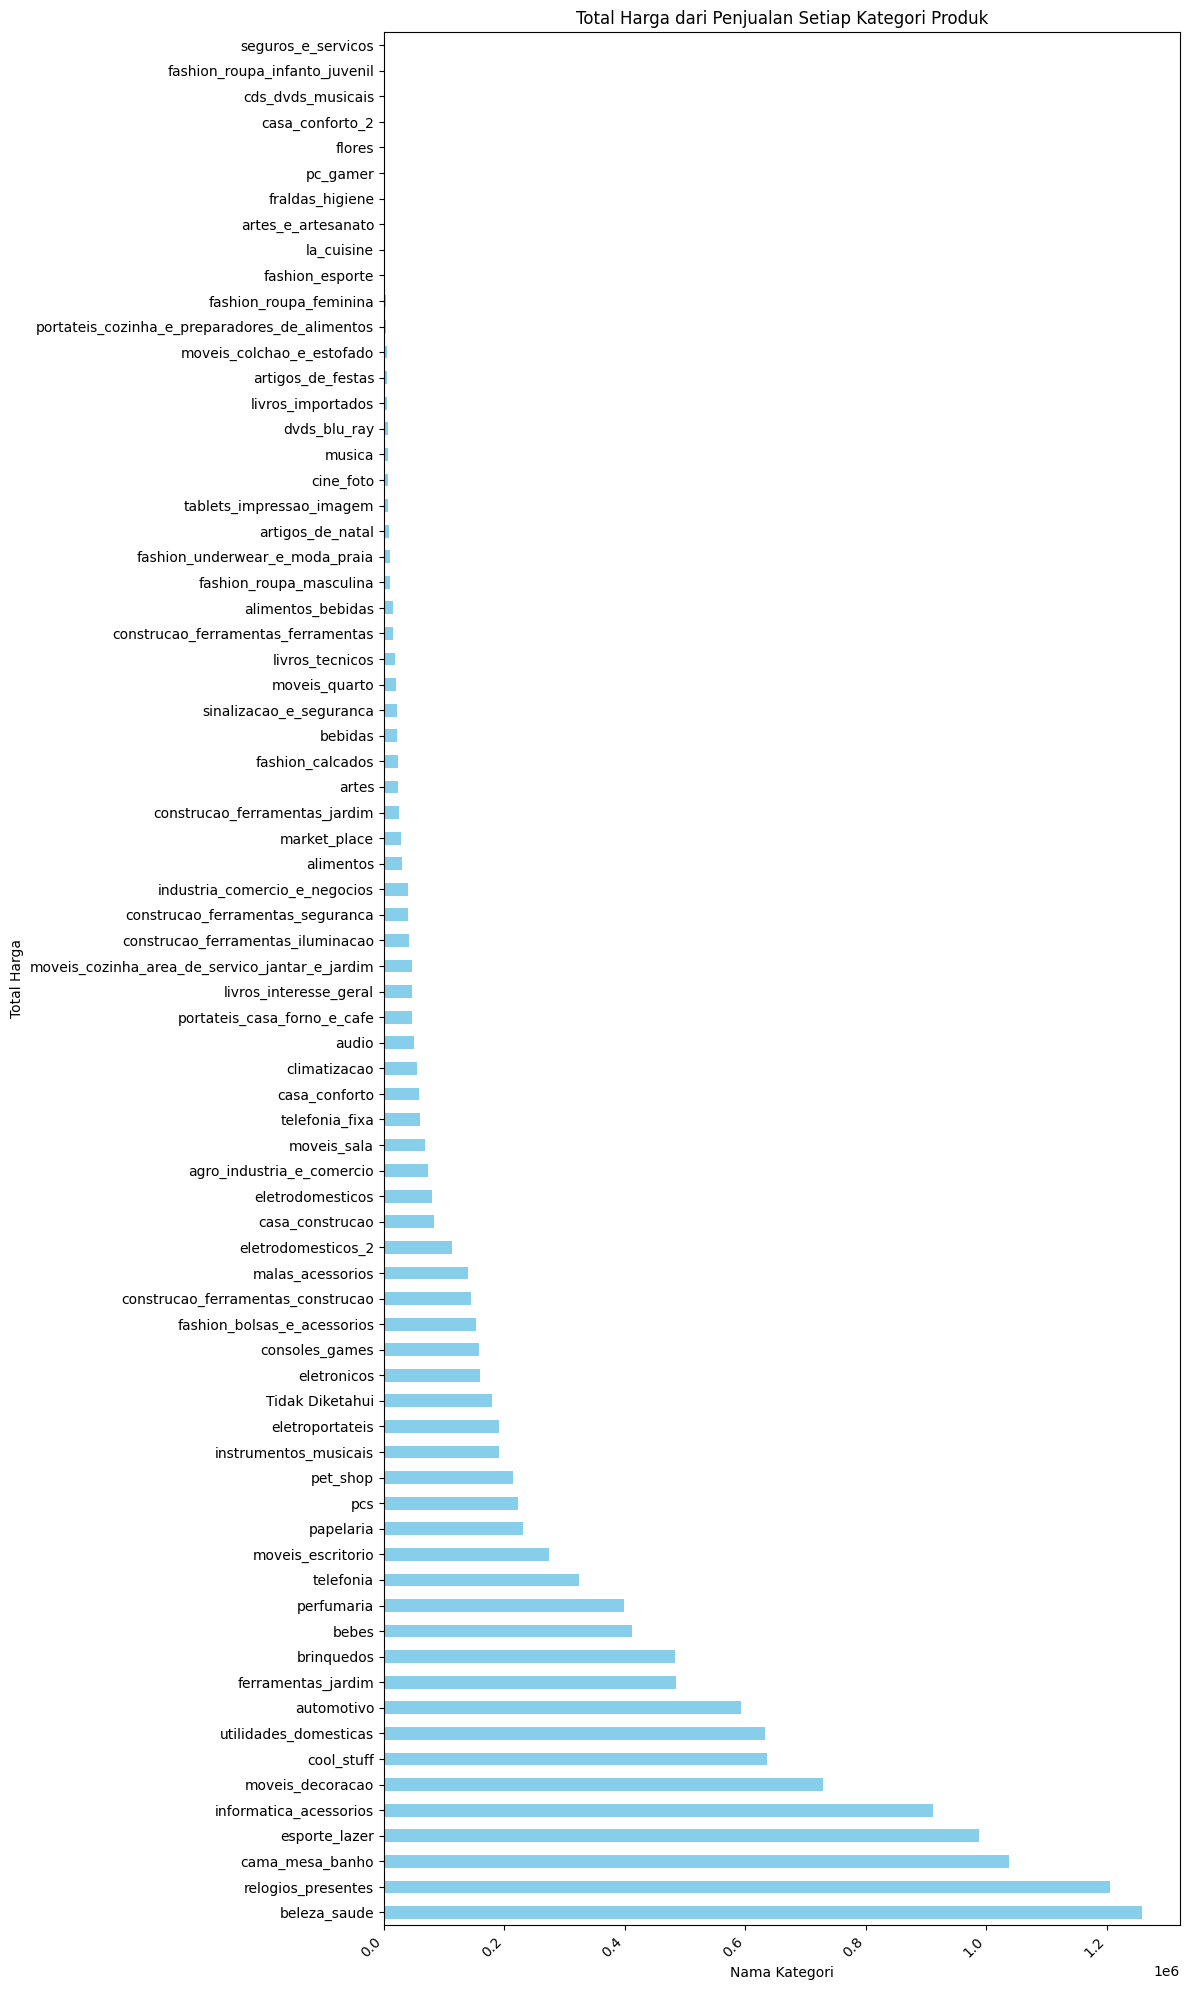

In [7]:
Q1_terurut = Q1_kelompok_Kategori_Harga.sort_values(ascending=False)

nama_kategori = Q1_terurut.index[0]

translation_data = pd.read_csv("product_category_name_translation.csv", delimiter=",")
nama_kategori_inggris = translation_data[translation_data['product_category_name'] == nama_kategori]['product_category_name_english'].values[0]

print("Kategori dengan pemasukan terbesar adalah \033[1;4m" + nama_kategori + "\033[0m atau dalam bahasa inggris \033[1;4m" + nama_kategori_inggris + "\033[0m\ndengan pemasukan total sebesar \033[1;4m" + str(Q1_terurut[0]) + "\033[0m")

plt.figure(figsize=(12, 20))
Q1_terurut.plot(kind='barh', color='skyblue')
plt.xlabel('Nama Kategori')
plt.ylabel('Total Harga')
plt.title('Total Harga dari Penjualan Setiap Kategori Produk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Pertama, dapat diurutkan terlebih dahulu berdasarkan pengeluaran total dengan menggunakan fungsi sort_values() pada kolom "price" dan flag ascending diset False agar pengurutan dilakukan secara menurun / descending

Nama kota dengan pengeluaran terbesar adalah nama kota yang muncul pertama sebab pengurutan dilakukan secara descending, nama kota tersebut bisa diakses dengan melihat nama index ke-0 dari dataset yang telah diurutkan

Terakhir, karena keterbatasan ukuran kanvas, bisa diplot 40 kota dengan pengeluaran terbesar dengan menggunakan fungsi head(40) sebelum histogram diplot sebagai berikut


Kota dengan pengeluaran terbesar adalah sao paulo dengan total pengeluaran sebesar 2203373.09


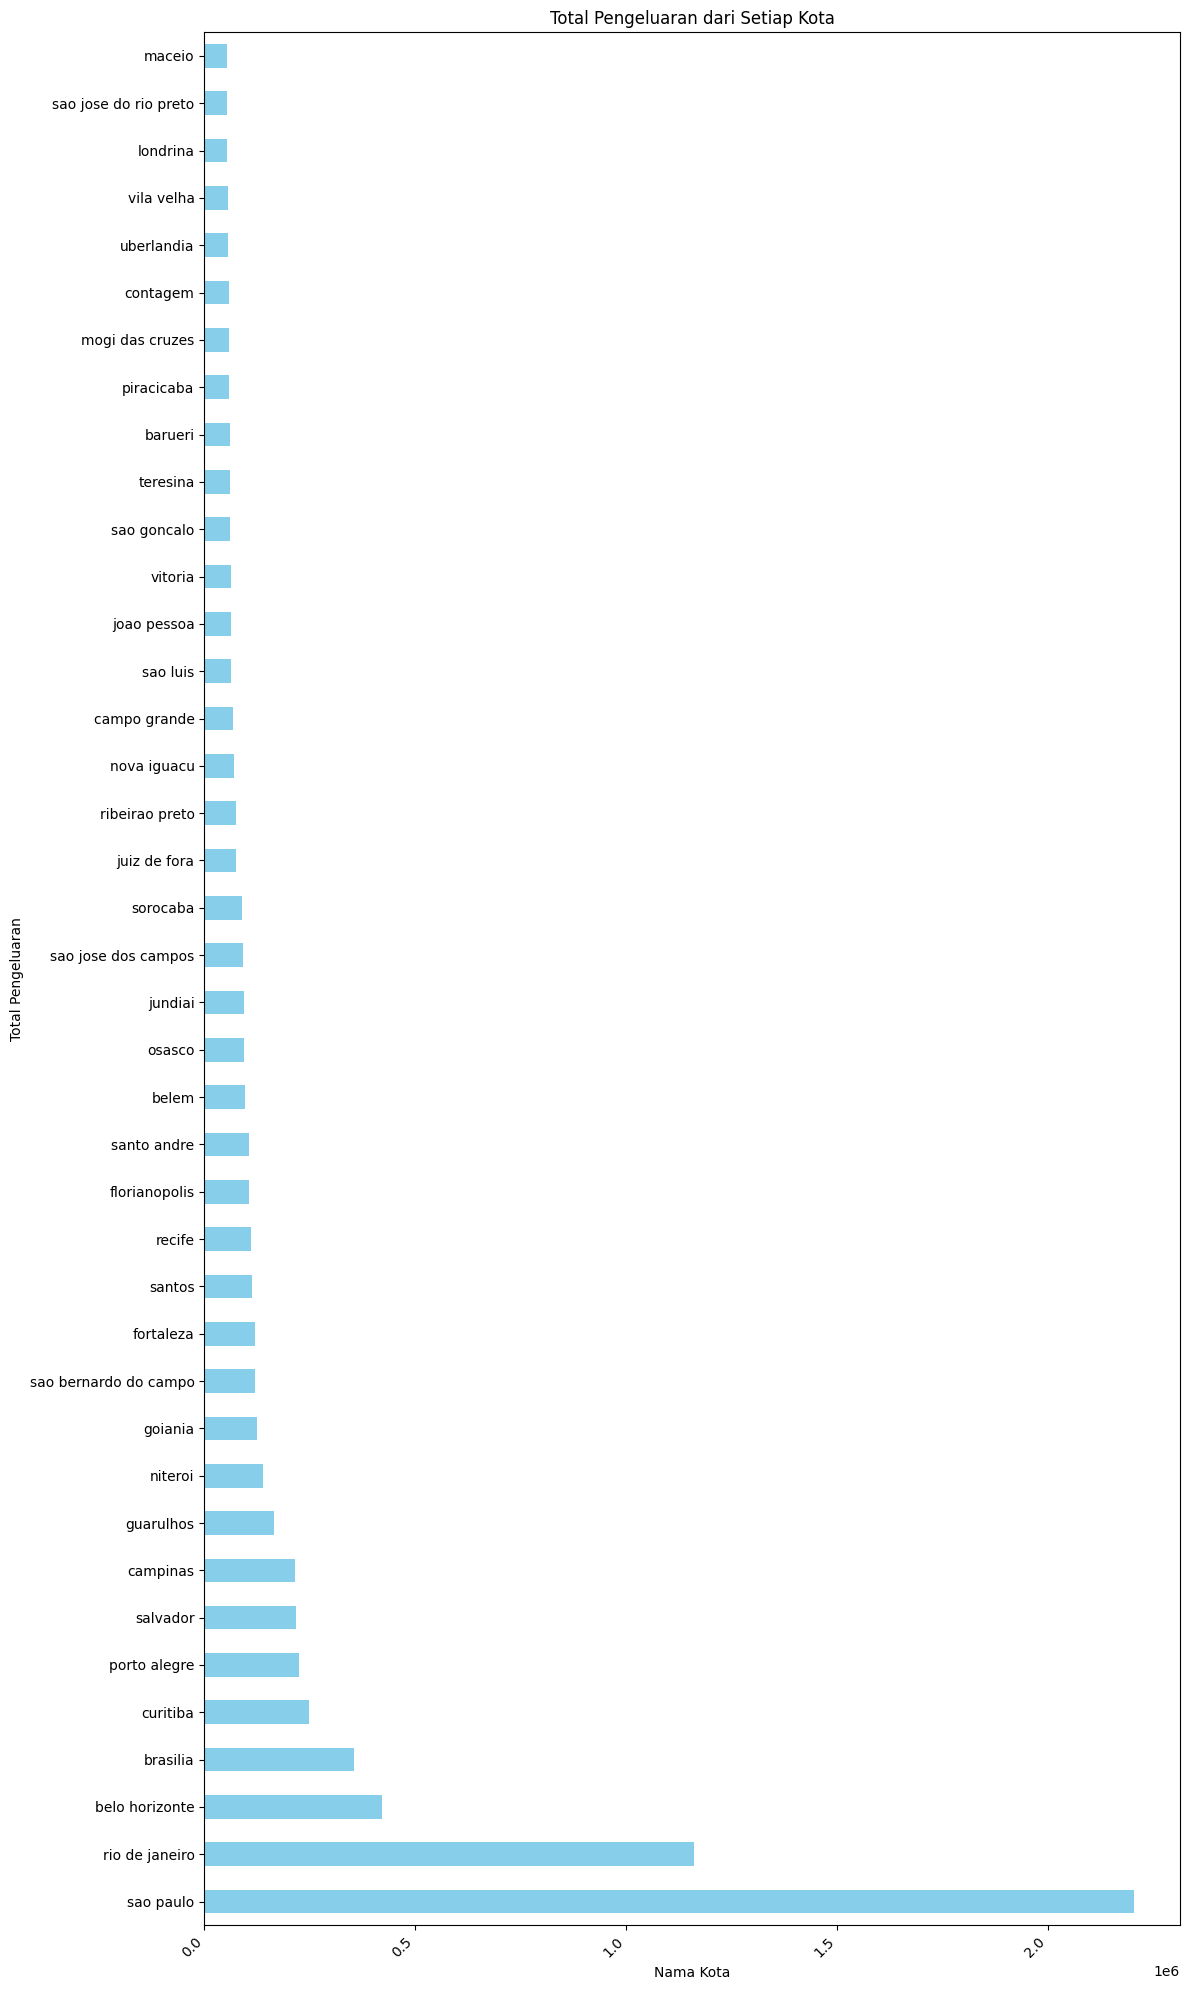

In [8]:
Q2_terurut = Q2_kelompok_Kota_Pengeluaran.sort_values(ascending=False)

nama_kota = Q2_terurut.index[0]

print("Kota dengan pengeluaran terbesar adalah \033[1;4m" + nama_kota + "\033[0m dengan total pengeluaran sebesar \033[1;4m" + str(Q2_terurut[0]) + "\033[0m")

plt.figure(figsize=(12, 20))
Q2_terurut.head(40).plot(kind='barh', color='skyblue')
plt.xlabel('Nama Kota')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran dari Setiap Kota')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 3:

Pertama, dapat diurutkan terlebih dahulu berdasarkan pengeluaran total dengan menggunakan fungsi sort_values() pada kolom "price" dan flag ascending diset False agar pengurutan dilakukan secara menurun / descending

Nama kota dengan pengeluaran terbesar adalah nama kota yang muncul pertama sebab pengurutan dilakukan secara descending, nama kota tersebut bisa diakses dengan melihat nama index ke-0 dari dataset yang telah diurutkan

Terakhir, data dapat diplot dengan menggunakan histogram


Bulan dengan pemasukan terbesar adalah November 2017 dengan total pemasukan sebesar 1010271.37


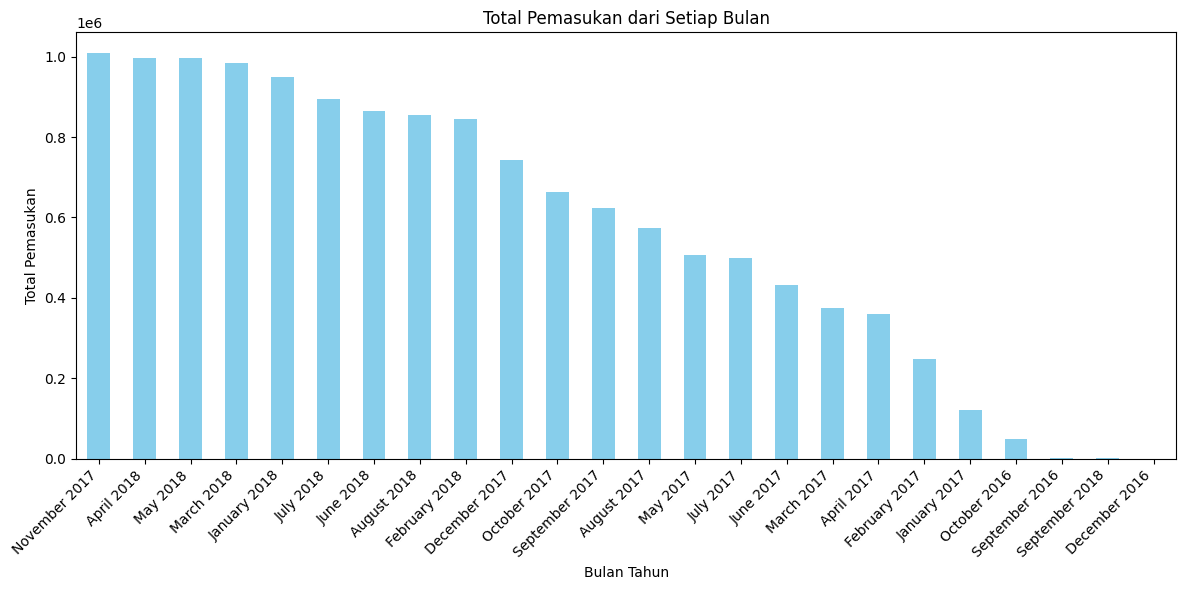

In [9]:
Q3_terurut = Q3_kelompok_Tanggal_Harga.sort_values(ascending=False)

bulan_tahun = Q3_terurut.index[0]

print("Bulan dengan pemasukan terbesar adalah \033[1;4m" + bulan_tahun + "\033[0m dengan total pemasukan sebesar \033[1;4m" + str(Q3_terurut[0]) + "\033[0m")

plt.figure(figsize=(12, 6))
Q3_terurut.plot(kind='bar', color='skyblue')
plt.xlabel('Bulan Tahun')
plt.ylabel('Total Pemasukan')
plt.title('Total Pemasukan dari Setiap Bulan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 4

Pertama, dapat diurutkan terlebih dahulu berdasarkan harga rata-rata dengan menggunakan fungsi sort_values() pada kolom "price" dan flag ascending diset False agar pengurutan dilakukan secara menurun / descending

Langkah berikut ini bersifat opsional, nama kategori produk bisa juga ditranslasikan ke bahasa inggris dengan menggunakan dataset translasi nama kategori kemudian dicari entry yang bersangkutan. Setelah nama kategori translasi ditemukan, bisa digunakan untuk menggantikan nama kategori sebelumnya, kemudian kolom translasi yang baru bisa didrop

Terakhir, hasil analisis bisa divisualisasikan sebagai horizontal bar chart karena jumlah kategori yang banyak

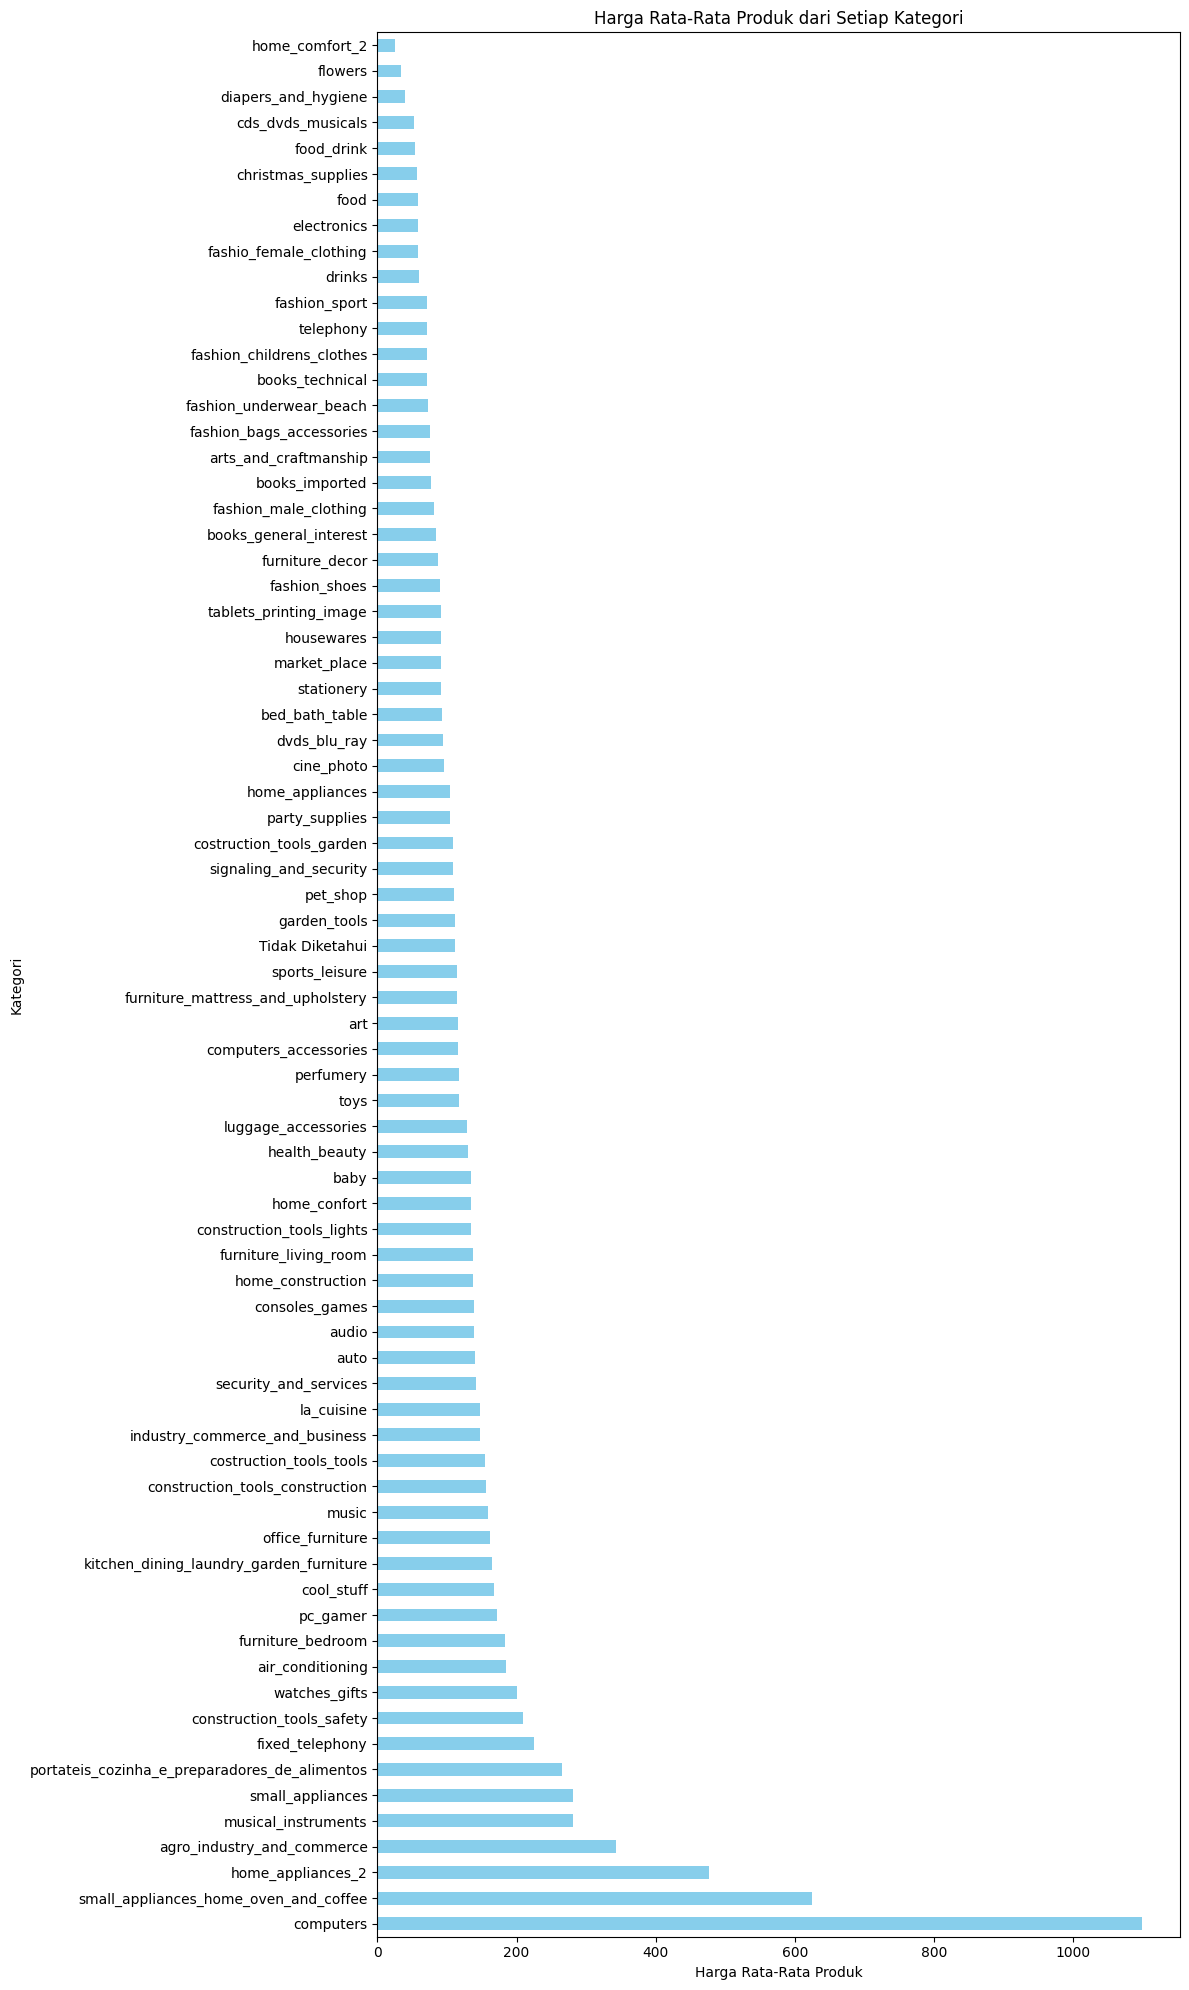

In [10]:
Q4_terurut = Q4_kelompok_produk_harga.sort_values(ascending=False)

translation_data = pd.read_csv("product_category_name_translation.csv", delimiter=",")
Q4_translated = pd.merge(Q4_terurut, translation_data, how='left', on='product_category_name')

def categorize(row):
    if pd.isna(row['product_category_name_english']):
        return row['product_category_name']
    else:
        return row['product_category_name_english']

Q4_translated['product_category_name'] = Q4_translated.apply(categorize, axis=1)
Q4_translated = Q4_translated.drop(columns=['product_category_name_english'])

plt.figure(figsize=(12, 20))
Q4_translated.set_index('product_category_name')['price'].plot(kind='barh', color='skyblue')
plt.xlabel('Harga Rata-Rata Produk')
plt.ylabel('Kategori')
plt.title('Harga Rata-Rata Produk dari Setiap Kategori')
plt.tight_layout()
plt.show()

In [11]:
Q4_terurut.describe(include="all")

count      74.000000
mean      146.319397
std       145.237947
min        25.342333
25%        82.534288
50%       114.646880
75%       152.810694
max      1098.340542
Name: price, dtype: float64

## Conclusion

- Conclusion pertanyaan 1 : Kategori dengan pemasukan terbesar adalah **beleza_saude** atau dalam bahasa inggris **health_beauty** dengan pemasukan total sebesar **1258681.34**
- Conclusion pertanyaan 2 : Kota dengan pengeluaran terbesar adalah **sao paulo** dengan pengeluaran total sebesar **2203373.09**
- Conclusion pertanyaan 3 : Bulan dengan pemasukan terbesar adalah **November 2017** dengan total pemasukan sebesar **1010271.37**
- Conclusion pertanyaan 4 : Dari 73 kategori yang ada, mayoritas memiliki harga yang relatif murah, terlihat dari distribusi kuartil hingga 75% hanya bernilai ~ BRL 150 saja. Sedangkan terdapat 3 kategori yang harga rata-rata produknya terlihat cukup mahal (> BRL 400) yaitu home_appliances_2, small_appliances_home_oven_and_coffee, dan computers

# RFM Analysis

- Dalam analisis RFM diperlukan 3 data utama yaitu id pelanggan, tanggal pemesanan dan harga pesanan. Oleh karena itu dibutuhkan 3 dataset yaitu dataset data order (key id pelanggan dan tanggal pemesanan), dataset pelanggan (id pelanggan) dan dataset detail order (harga pesanan). Dataset pelanggan diperlukan sebab kolom customer_id di dataset data order unik sedangkan 1 pelanggan bisa memiliki lebih dari 1 order

- Kemudian, data transaksi dikelompokkan berdasarkan id pembelian untuk menghitung nominal pesanan total

- Gabungkan data detail order yang sudah dikelompokkan, data pelanggan dan data order. Setelah itu, ekstrak data tanggal, bulan dan tahun dari kolom tanggal pembelian

- Hitung berapa hari yang lalukah pemesanan terakhir dari setiap pelanggan (diasumsikan bahwa analisa dilakukan di hari terakhir ada pemesanan yang masuk)

- Hitung jumlah pemesanan yang dilakukan oleh setiap pelanggan

- Hitung total nilai pemesanan yang dilakukan oleh setiap pelanggan di semua pesanan mereka

- Gabungkan 3 dataframe baru yang dibuat menjadi 1 dataframe untuk analisis selanjutnya

- Buat peringkat untuk ketiga parameter nilai, R_rank untuk recency, F_rank untuk frequency, dan M_rank untuk monetary. Lakukan normalisasi pada setiap ranking tersebut, kemudian nilai awal sebelum normalisasi bisa didrop

- nilai skor RFM dari setiap pelanggan dihitung dengan memberikan bobot tertentu untuk setiap kategori penilaian. Dalam kasus ini, kedatangan terakhir (Recency) diberikan bobot 0.15, jumlah kedatangan (frequency) diberikan bobot 0.28, dan pengeluaran total (monetary) diberikan bobot 0.57

- Data yang kini dibutuhkan hanyalah skor RFM dan id dari pelanggan, sehingga bisa kita ambil data tersebut saja

- nilai skor RFM sekarang dapat dianalisa nilai minimal, maksimal serta quartil dari distribusi skornya


In [12]:
order_detail = pd.read_csv("order_items_dataset.csv", delimiter=",")
customer_data = pd.read_csv("customers_dataset.csv", delimiter=",")
order_data = pd.read_csv("orders_dataset.csv", delimiter=",")

order_detail_kelompok = order_detail.groupby('order_id')['price'].sum()

RFM_data = pd.merge(order_detail_kelompok, order_data, on='order_id')
RFM_data = pd.merge(RFM_data, customer_data, on='customer_id')

RFM_data['order_date'] = pd.to_datetime(RFM_data['order_purchase_timestamp']).dt.date

df_recency = RFM_data.groupby(by='customer_unique_id', as_index=False)['order_date'].max()
recent_order = df_recency['order_date'].max()
df_recency['Recency'] = df_recency['order_date'].apply(lambda x: (recent_order - x).days)

frequency_df = RFM_data.drop_duplicates().groupby(by=['customer_unique_id'], as_index=False)['order_date'].count()
frequency_df.columns = ['customer_unique_id', 'Frequency']

monetary_df = RFM_data.groupby(by='customer_unique_id', as_index=False)['price'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']

rf_df = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_date')

rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']

rfm_score = rfm_df[['customer_unique_id', 'RFM_Score']].copy()

print("Customer dengan skor RFM terendah:", rfm_score[rfm_score['RFM_Score'] == rfm_score['RFM_Score'].min()]['customer_unique_id'].values[0])
print("Customer dengan skor RFM terbaik:", rfm_score[rfm_score['RFM_Score'] == rfm_score['RFM_Score'].max()]['customer_unique_id'].values[0])
print("Min RFM_Score:", rfm_score['RFM_Score'].min())
print("25% (Q1) RFM_Score:", rfm_score['RFM_Score'].quantile(0.25))
print("50% (Q2) RFM_Score:", rfm_score['RFM_Score'].quantile(0.50))
print("75% (Q3) RFM_Score:", rfm_score['RFM_Score'].quantile(0.75))
print("Max RFM_Score:", rfm_score['RFM_Score'].max())

Customer dengan skor RFM terendah: b7d76e111c89f7ebf14761390f0f7d17
Customer dengan skor RFM terbaik: dc813062e0fc23409cd255f7f53c7074
Min RFM_Score: 41.20315447495284
25% (Q1) RFM_Score: 45.05486271221966
50% (Q2) RFM_Score: 48.910893942569686
75% (Q3) RFM_Score: 52.780051351917834
Max RFM_Score: 99.92671871725005


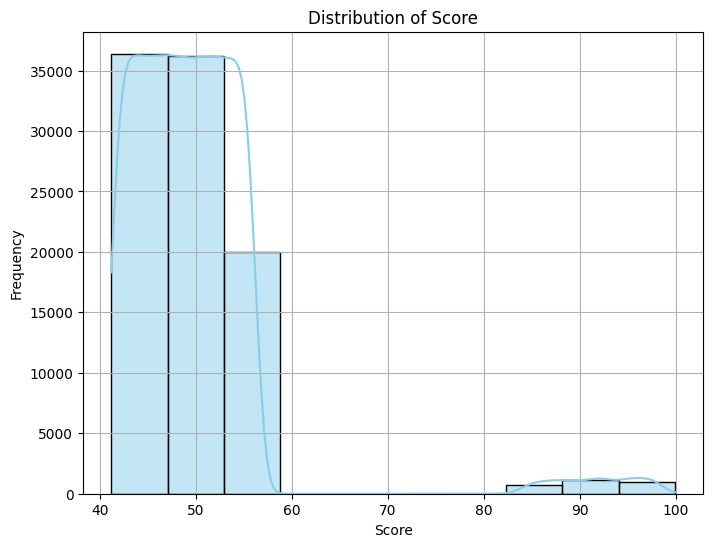

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(rfm_score['RFM_Score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### RFM Analysis Conclusion
- Semua pelanggan memiliki nilai RFM pada rentang 41.2 - 99.9 (skor maksimal adalah 100)
- Pelanggan dengan ID **b7d76e111c89f7ebf14761390f0f7d17** memiliki skor RFM terendah
- Pelanggan dengan ID **dc813062e0fc23409cd255f7f53c7074** memiliki skor RFM tertinggi
- Seperti terlihat pada histogram, terdapat 2 jenis utama pelanggan yaitu tidak loyal dengan jumlah pelanggan sangat banyak (skor RFM < 60) atau sangat loyal namun jumlah pelanggan sangat sedikit (skor RFM > 80)
